<a href="https://colab.research.google.com/github/mudather490/lab-Gradient-descent/blob/main/lab_grieat_de.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tysonpo/ice-cream-dataset")

print("Path to dataset files:", path)

100%|██████████| 52.8M/52.8M [00:02<00:00, 24.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/tysonpo/ice-cream-dataset/versions/3


In [2]:
import os

# List all files and subdirectories in the given path
files_in_directory = os.listdir(path)

print(f"Files and subdirectories in '{path}':")
for file_name in files_in_directory:
    print(file_name)

Files and subdirectories in '/root/.cache/kagglehub/datasets/tysonpo/ice-cream-dataset/versions/3':
talenti
bj
breyers
combined
hd


**Reasoning**:
The previous step listed subdirectories. To find the specific CSV files, I need to list the contents of each subdirectory to identify files with a '.csv' extension that might contain product and reviews data.



In [3]:
import os

# Iterate through each subdirectory and list its contents
print(f"Inspecting subdirectories within '{path}':")
for subdir_name in files_in_directory:
    subdir_path = os.path.join(path, subdir_name)
    if os.path.isdir(subdir_path):
        print(f"\nFiles in '{subdir_path}':")
        for file_name in os.listdir(subdir_path):
            print(f"  {file_name}")

Inspecting subdirectories within '/root/.cache/kagglehub/datasets/tysonpo/ice-cream-dataset/versions/3':

Files in '/root/.cache/kagglehub/datasets/tysonpo/ice-cream-dataset/versions/3/talenti':
  reviews.csv
  images
  products.csv

Files in '/root/.cache/kagglehub/datasets/tysonpo/ice-cream-dataset/versions/3/bj':
  reviews.csv
  images
  products.csv

Files in '/root/.cache/kagglehub/datasets/tysonpo/ice-cream-dataset/versions/3/breyers':
  reviews.csv
  images
  products.csv

Files in '/root/.cache/kagglehub/datasets/tysonpo/ice-cream-dataset/versions/3/combined':
  reviews.csv
  images
  products.csv

Files in '/root/.cache/kagglehub/datasets/tysonpo/ice-cream-dataset/versions/3/hd':
  reviews.csv
  images
  products.csv


**Reasoning**:
Now that the relevant CSV files (products.csv and reviews.csv within the 'combined' directory) have been identified, I will use pandas to load them into two separate DataFrames.



In [4]:
import pandas as pd
import os

# Construct the full paths to the 'combined' products and reviews CSV files
combined_dir_path = os.path.join(path, 'combined')
products_csv_path = os.path.join(combined_dir_path, 'products.csv')
reviews_csv_path = os.path.join(combined_dir_path, 'reviews.csv')

# Load the products data into a DataFrame
df_products = pd.read_csv(products_csv_path)

# Load the reviews data into a DataFrame
df_reviews = pd.read_csv(reviews_csv_path)

print("Products DataFrame (first 5 rows):")
print(df_products.head())
print("\nReviews DataFrame (first 5 rows):")
print(df_reviews.head())

Products DataFrame (first 5 rows):
  brand   key                 name  \
0    bj  0_bj  Salted Caramel Core   
1    bj  1_bj  Netflix & Chilll'd™   
2    bj  2_bj         Chip Happens   
3    bj  3_bj              Cannoli   
4    bj  4_bj       Gimme S’more!™   

                                             subhead  \
0  Sweet Cream Ice Cream with Blonde Brownies & a...   
1  Peanut Butter Ice Cream with Sweet & Salty Pre...   
2  A Cold Mess of Chocolate Ice Cream with Fudge ...   
3  Mascarpone Ice Cream with Fudge-Covered Pastry...   
4  Toasted Marshmallow Ice Cream with Chocolate C...   

                                         description  rating  rating_count  \
0  Find your way to the ultimate ice cream experi...     3.7           208   
1  There’s something for everyone to watch on Net...     4.0           127   
2  Sometimes “chip” happens and everything’s a me...     4.7           130   
3  As a Limited Batch that captured the rapture o...     3.6            70   
4  It’s a

In [5]:
print("\n--- Products DataFrame Info ---")
df_products.info()

print("\n--- Reviews DataFrame Info ---")
df_reviews.info()

print("\n--- Products DataFrame Descriptive Statistics ---")
print(df_products.describe())

print("\n--- Reviews DataFrame Descriptive Statistics ---")
print(df_reviews.describe())


--- Products DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         241 non-null    object 
 1   key           241 non-null    object 
 2   name          241 non-null    object 
 3   subhead       57 non-null     object 
 4   description   237 non-null    object 
 5   rating        241 non-null    float64
 6   rating_count  241 non-null    int64  
 7   ingredients   241 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 15.2+ KB

--- Reviews DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21674 entries, 0 to 21673
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        21674 non-null  object 
 1   key          21674 non-null  object 
 2   author       20873 non-null  object 
 3   date         2

In [6]:
print("\n--- Products DataFrame Head ---")
print(df_products.head())

print("\n--- Reviews DataFrame Head ---")
print(df_reviews.head())


--- Products DataFrame Head ---
  brand   key                 name  \
0    bj  0_bj  Salted Caramel Core   
1    bj  1_bj  Netflix & Chilll'd™   
2    bj  2_bj         Chip Happens   
3    bj  3_bj              Cannoli   
4    bj  4_bj       Gimme S’more!™   

                                             subhead  \
0  Sweet Cream Ice Cream with Blonde Brownies & a...   
1  Peanut Butter Ice Cream with Sweet & Salty Pre...   
2  A Cold Mess of Chocolate Ice Cream with Fudge ...   
3  Mascarpone Ice Cream with Fudge-Covered Pastry...   
4  Toasted Marshmallow Ice Cream with Chocolate C...   

                                         description  rating  rating_count  \
0  Find your way to the ultimate ice cream experi...     3.7           208   
1  There’s something for everyone to watch on Net...     4.0           127   
2  Sometimes “chip” happens and everything’s a me...     4.7           130   
3  As a Limited Batch that captured the rapture o...     3.6            70   
4  It’s a g

In [7]:
print("\n--- Unique Brands and their Counts ---")
print(df_products['brand'].value_counts())

print("\n--- Number of Unique Product Names ---")
print(f"Number of unique products: {df_products['name'].nunique()}")

print("\n--- Descriptive Statistics for 'rating' and 'rating_count' ---")
print(df_products[['rating', 'rating_count']].describe())


--- Unique Brands and their Counts ---
brand
hd         70
breyers    69
bj         57
talenti    45
Name: count, dtype: int64

--- Number of Unique Product Names ---
Number of unique products: 240

--- Descriptive Statistics for 'rating' and 'rating_count' ---
           rating  rating_count
count  241.000000    241.000000
mean     4.223237     90.016598
std      0.620383    111.349449
min      1.200000      2.000000
25%      4.000000     28.000000
50%      4.400000     59.000000
75%      4.700000    112.000000
max      5.000000    983.000000


In [8]:
print("\n--- Distribution of Ratings ('stars' column) ---")
print(df_reviews['stars'].value_counts())
print("\n--- Normalized Distribution of Ratings ('stars' column) ---")
print(df_reviews['stars'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')


--- Distribution of Ratings ('stars' column) ---
stars
5    15388
1     2404
4     1691
2     1131
3     1060
Name: count, dtype: int64

--- Normalized Distribution of Ratings ('stars' column) ---
stars
5     71.0%
1    11.09%
4      7.8%
2     5.22%
3     4.89%
Name: proportion, dtype: object


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import Counter

# Download necessary NLTK data (if not already downloaded)
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True) # Explicitly download punkt_tab as suggested by the error

# Extract all review texts
review_texts = df_reviews['text'].dropna().astype(str).tolist()

# Preprocessing and tokenization
all_words = []
stop_words = set(stopwords.words('english'))

for text in review_texts:
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize into individual words
    tokens = word_tokenize(text)
    # Remove stop words and single-character words
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words and len(word) > 1]
    all_words.extend(filtered_tokens)

# Calculate word frequency
word_counts = Counter(all_words)

print(
    "\n--- Top 20 Most Common Words in Reviews ---"
)
# Display the top 20 most common words
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}")


--- Top 20 Most Common Words in Reviews ---
ice: 18505
cream: 18241
flavor: 10844
love: 7217
chocolate: 6833
like: 5550
one: 4830
favorite: 4518
good: 4510
taste: 4084
vanilla: 3689
best: 3598
cookie: 3355
would: 3014
creamy: 3007
delicious: 2956
flavors: 2915
dough: 2586
great: 2539
ever: 2343


/tmp/ipython-input-616690639.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_products['brand'].value_counts().index, y=df_products['brand'].value_counts().values, palette='viridis')


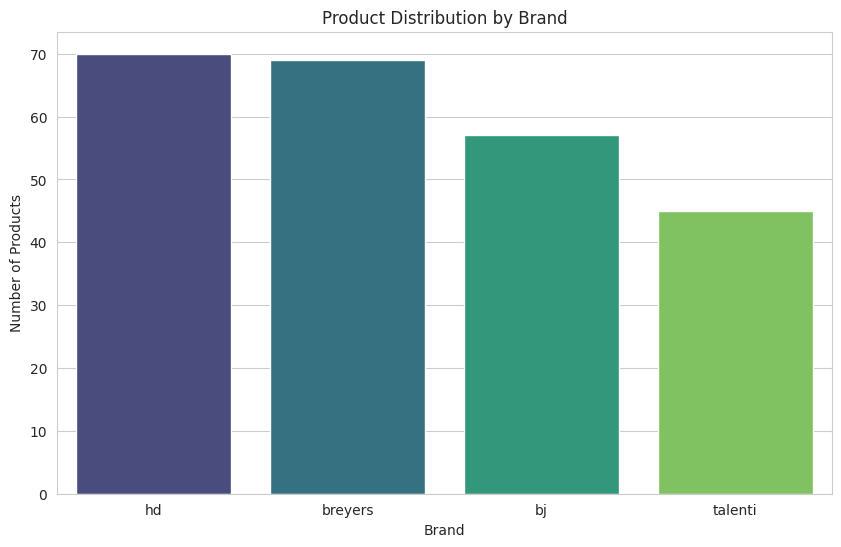

In [12]:
try:
    import wordcloud
except ImportError:
    %pip install wordcloud

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set plot style
sns.set_style('whitegrid')

# 2. Create a bar chart to visualize the distribution of products by brand
plt.figure(figsize=(10, 6))
sns.barplot(x=df_products['brand'].value_counts().index, y=df_products['brand'].value_counts().values, palette='viridis')
plt.title('Product Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.show()

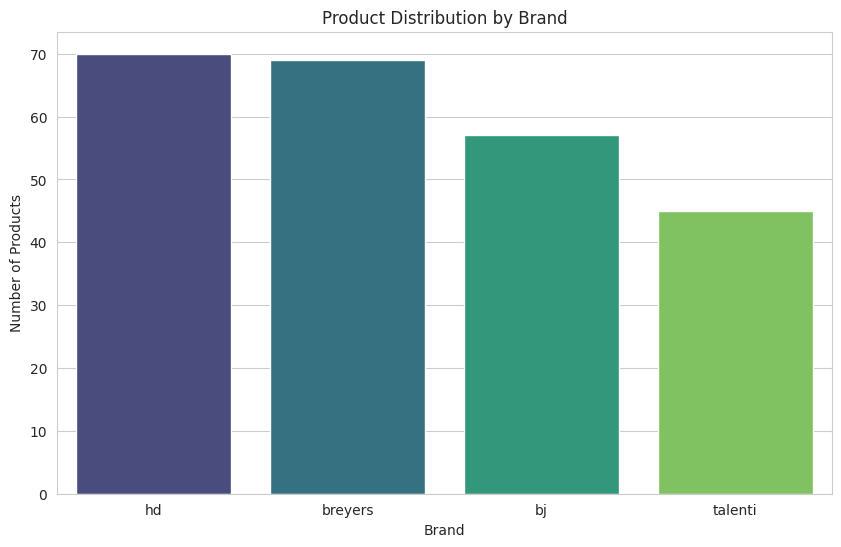

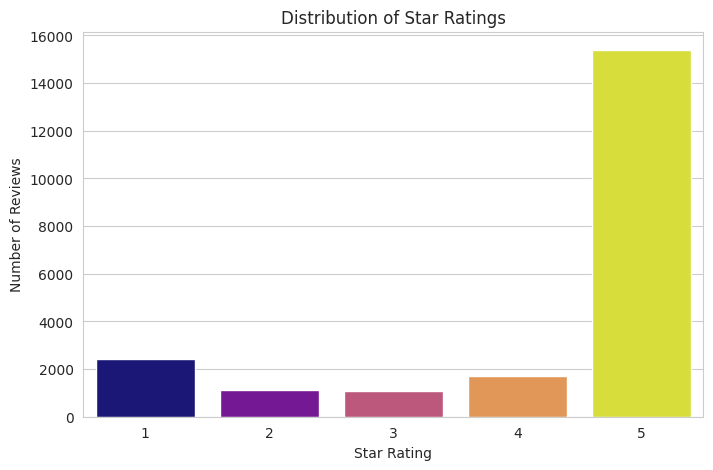

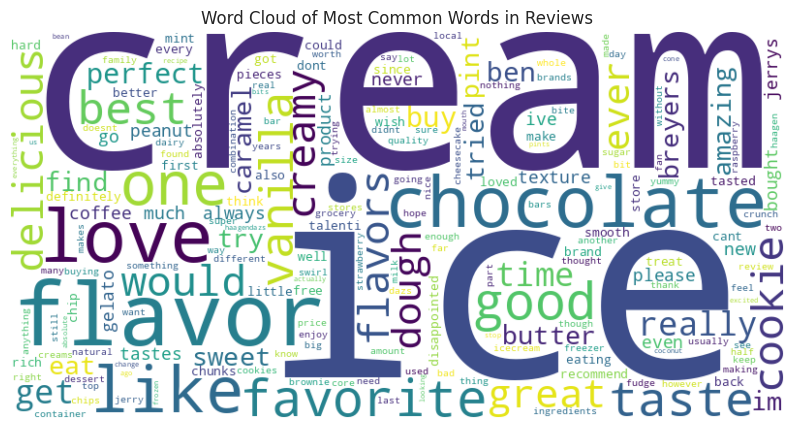

In [13]:
try:
    import wordcloud
except ImportError:
    %pip install wordcloud

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Set plot style
sns.set_style('whitegrid')

# 2. Create a bar chart to visualize the distribution of products by brand
plt.figure(figsize=(10, 6))
sns.barplot(x=df_products['brand'].value_counts().index, y=df_products['brand'].value_counts().values, palette='viridis', hue=df_products['brand'].value_counts().index, legend=False)
plt.title('Product Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.show()

# 3. Create a bar chart to visualize the distribution of star ratings in df_reviews
plt.figure(figsize=(8, 5))
star_counts = df_reviews['stars'].value_counts().sort_index()
sns.barplot(x=star_counts.index, y=star_counts.values, palette='plasma', hue=star_counts.index, legend=False)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()

# 4. Generate and display a word cloud for the top 20 common words
# Ensure word_counts dictionary is available from previous steps
# If not, recreate it (assuming it's available for this step)
if 'word_counts' not in locals():
    # Re-executing relevant NLTK code if word_counts is not found
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    import string
    from collections import Counter

    nltk.download('stopwords', quiet=True)
    nltk.download('punkt', quiet=True)
    nltk.download('punkt_tab', quiet=True)

    review_texts = df_reviews['text'].dropna().astype(str).tolist()
    all_words = []
    stop_words = set(stopwords.words('english'))

    for text in review_texts:
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words and len(word) > 1]
        all_words.extend(filtered_tokens)
    word_counts = Counter(all_words)

wordcloud_obj = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_obj, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Reviews')
plt.show()


In [14]:
print("\n--- Products DataFrame (name, brand, rating columns) ---")
print(df_products[['name', 'brand', 'rating']].to_string())


--- Products DataFrame (name, brand, rating columns) ---
                                                            name    brand  rating
0                                            Salted Caramel Core       bj     3.7
1                                            Netflix & Chilll'd™       bj     4.0
2                                                   Chip Happens       bj     4.7
3                                                        Cannoli       bj     3.6
4                                                 Gimme S’more!™       bj     4.5
5                                      Peanut Butter Half Baked®       bj     4.9
6                                         Berry Sweet Mascarpone       bj     4.6
7                                  Chocolate Peanut Butter Split       bj     5.0
8                                              Justice ReMix'd ™       bj     4.3
9                                          Boots on the Moooo’n™       bj     4.7
10                                      

In [15]:
product_name_1 = "Chocolate Chip Cookie Dough"
product_brand_1 = "bj"
product_rating_1 = df_products[(df_products['name'] == product_name_1) & (df_products['brand'] == product_brand_1)]['rating'].values[0]

product_name_2 = "Chocolate Chip Cookie Dough"
product_brand_2 = "breyers"
product_rating_2 = df_products[(df_products['name'] == product_name_2) & (df_products['brand'] == product_brand_2)]['rating'].values[0]

print(f"Selected Product 1: {product_name_1} ({product_brand_1}) with rating: {product_rating_1}")
print(f"Selected Product 2: {product_name_2} ({product_brand_2}) with rating: {product_rating_2}")

Selected Product 1: Chocolate Chip Cookie Dough (bj) with rating: 4.6
Selected Product 2: Chocolate Chip Cookie Dough (breyers) with rating: 1.2


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for the selected products
comparison_data = {
    'Product': [f"{product_name_1} ({product_brand_1})", f"{product_name_2} ({product_brand_2})"],
    'Rating': [product_rating_1, product_rating_2]
}
df_comparison = pd.DataFrame(comparison_data)

print("Comparison DataFrame:")
print(df_comparison)

Comparison DataFrame:
                                 Product  Rating
0       Chocolate Chip Cookie Dough (bj)     4.6
1  Chocolate Chip Cookie Dough (breyers)     1.2


/tmp/ipython-input-913209924.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Rating', data=df_comparison, palette='coolwarm')


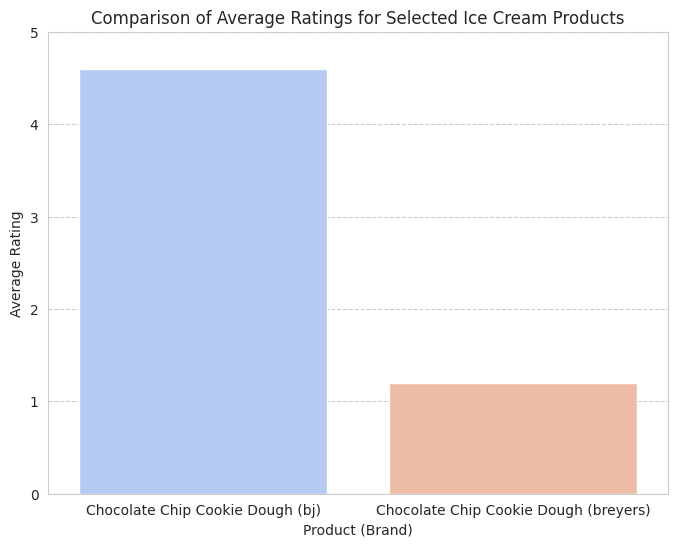


--- Comparison Summary ---
Product 1: Chocolate Chip Cookie Dough (bj) has an average rating of 4.6.
Product 2: Chocolate Chip Cookie Dough (breyers) has an average rating of 1.2.
Conclusion: Chocolate Chip Cookie Dough (bj) has a significantly higher average rating than Chocolate Chip Cookie Dough (breyers).


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart to visualize the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Product', y='Rating', data=df_comparison, palette='coolwarm')
plt.title('Comparison of Average Ratings for Selected Ice Cream Products')
plt.xlabel('Product (Brand)')
plt.ylabel('Average Rating')
plt.ylim(0, 5) # Ratings are typically 1-5
plt.grid(axis='y', linestyle='--')
plt.show()

# Summarize the comparison
print("\n--- Comparison Summary ---")
product1_info = df_comparison.iloc[0]
product2_info = df_comparison.iloc[1]

print(f"Product 1: {product1_info['Product']} has an average rating of {product1_info['Rating']:.1f}.")
print(f"Product 2: {product2_info['Product']} has an average rating of {product2_info['Rating']:.1f}.")

if product1_info['Rating'] > product2_info['Rating']:
    print(f"Conclusion: {product1_info['Product']} has a significantly higher average rating than {product2_info['Product']}.")
elif product2_info['Rating'] > product1_info['Rating']:
    print(f"Conclusion: {product2_info['Product']} has a significantly higher average rating than {product1_info['Product']}.")
else:
    print("Conclusion: Both products have the same average rating.")

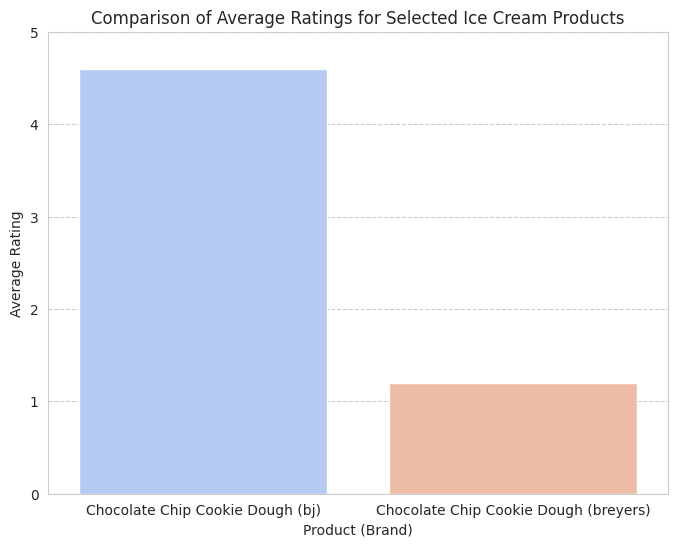


--- Comparison Summary ---
Product 1: Chocolate Chip Cookie Dough (bj) has an average rating of 4.6.
Product 2: Chocolate Chip Cookie Dough (breyers) has an average rating of 1.2.
Conclusion: Chocolate Chip Cookie Dough (bj) has a significantly higher average rating than Chocolate Chip Cookie Dough (breyers).


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart to visualize the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Product', y='Rating', data=df_comparison, palette='coolwarm', hue='Product', legend=False)
plt.title('Comparison of Average Ratings for Selected Ice Cream Products')
plt.xlabel('Product (Brand)')
plt.ylabel('Average Rating')
plt.ylim(0, 5) # Ratings are typically 1-5
plt.grid(axis='y', linestyle='--')
plt.show()

# Summarize the comparison
print("\n--- Comparison Summary ---")
product1_info = df_comparison.iloc[0]
product2_info = df_comparison.iloc[1]

print(f"Product 1: {product1_info['Product']} has an average rating of {product1_info['Rating']:.1f}.")
print(f"Product 2: {product2_info['Product']} has an average rating of {product2_info['Rating']:.1f}.")

if product1_info['Rating'] > product2_info['Rating']:
    print(f"Conclusion: {product1_info['Product']} has a significantly higher average rating than {product2_info['Product']}.")
elif product2_info['Rating'] > product1_info['Rating']:
    print(f"Conclusion: {product2_info['Product']} has a significantly higher average rating than {product1_info['Product']}.")
else:
    print("Conclusion: Both products have the same average rating.")